# **Load libraries/ data**

In [95]:
import pandas as pd
import numpy as np

Load data

In [96]:
# Load the data from the first sheet
file_path = '/content/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.xlsx'
df = pd.read_excel(file_path)


# **Data Cleaning**

In [97]:
def final_comprehensive_extract_race_age_sex(label):
    race = None
    age = None
    sex = None

    # Define patterns for race, age, and sex
    race_patterns = [
        'White', 'Black or African American', 'American Indian or Alaska Native',
        'Asian or Pacific Islander', 'Hispanic or Latino', 'Not Hispanic or Latino',
        'Asian', 'Native Hawaiian or Other Pacific Islander'
    ]
    age_patterns = [
        'Under 15 years', '15-24 years', '25-34 years', '35-44 years',
        '45-54 years', '55-64 years', '65-74 years', '75-84 years',
        '85 years and over'
    ]
    sex_patterns = ['Male', 'Female']

    # Handle "All persons"
    if label == 'All persons':
        return pd.Series(['All persons', 'All ages', 'All sexes'])

    # Extract sex first
    for pattern in sex_patterns:
        if pattern in label:
            sex = pattern
            label = label.replace(pattern + ": ", "")
            break

    # Extract age
    for pattern in age_patterns:
        if pattern in label:
            age = pattern
            label = label.replace(pattern, "")
            break

    # Extract race
    for pattern in race_patterns:
        if pattern in label:
            race = pattern
            break

    return pd.Series([race, age, sex])




In [98]:
# Rename the 'UNIT' column values according to the specified mapping
df['UNIT'] = df['UNIT'].replace({
    'Deaths per 100,000 resident population, age-adjusted': 'age adjusted',
    'Deaths per 100,000 resident population, crude': 'crude'
})



In [99]:
# Mapping for the 'PANEL' column to the specified abbreviations
panel_mapping = {
    'Drug overdose deaths involving any opioid': 'Any Opioids',
    'Drug overdose deaths involving natural and semisynthetic opioids': 'Nat. & Semi-opioids',
    'Drug overdose deaths involving methadone': 'Methadone',
    'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Other Synthetics (excl. Methadone)',
    'Drug overdose deaths involving heroin': 'Heroin'
}

# Apply the mapping to the 'PANEL' column
df['PANEL'] = df['PANEL'].replace(panel_mapping)


In [100]:
missing_values = df.isnull().sum()
print('Missing values in each column:\n', missing_values)

# Fill missing values (example: fill with zero, mean, or drop rows)
# df.fillna(0, inplace=True)  # Or use a more appropriate method based on your data

Missing values in each column:
 INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64


# **Data Analysis and Visualization**

In [ ]:
# Ensure correct data types
df['YEAR'] = df['YEAR'].astype(int)
df['AGE_NUM'] = df['AGE_NUM'].astype(float)

In [ ]:


# Ensure correct data types
df['YEAR'] = df['YEAR'].astype(int)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize categorical data
df['AGE'] = df['AGE'].str.strip().str.title()
df['STUB_LABEL'] = df['STUB_LABEL'].str.strip().str.title()

df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All Persons,0.1,1999,1,All Ages,1.1,6.1,0
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All Persons,0.1,2000,2,All Ages,1.1,6.2,0
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All Persons,0.1,2001,3,All Ages,1.1,6.8,0
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All Persons,0.1,2002,4,All Ages,1.1,8.2,0
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All Persons,0.1,2003,5,All Ages,1.1,8.9,0


In [ ]:
# Aggregate data by year
agg_by_year = df.groupby('YEAR')['ESTIMATE'].sum().reset_index()

# Aggregate data by drug overdose type
agg_by_drug_type = df.groupby(['YEAR', 'PANEL'])['ESTIMATE'].sum().reset_index()

# Aggregate data by sex
agg_by_sex = df.groupby(['YEAR', 'STUB_LABEL'])['ESTIMATE'].sum().reset_index()

# Aggregate data by age
agg_by_age = df.groupby(['YEAR', 'AGE'])['ESTIMATE'].sum().reset_index()

# Aggregate data by race
agg_by_race = df.groupby(['YEAR', 'STUB_LABEL'])['ESTIMATE'].sum().reset_index()


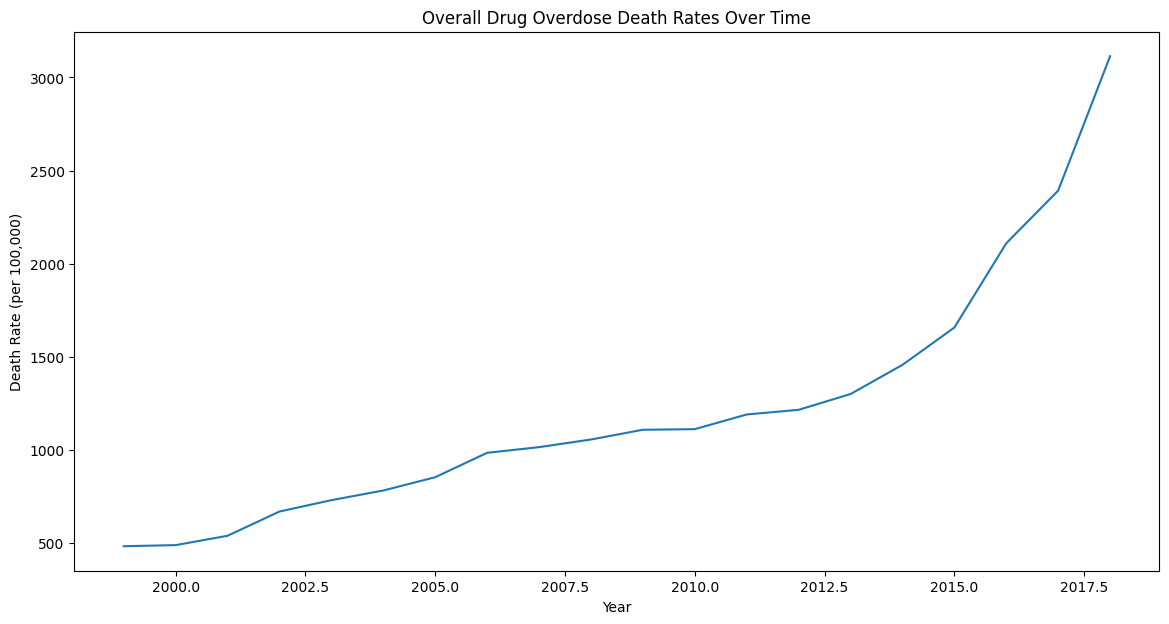

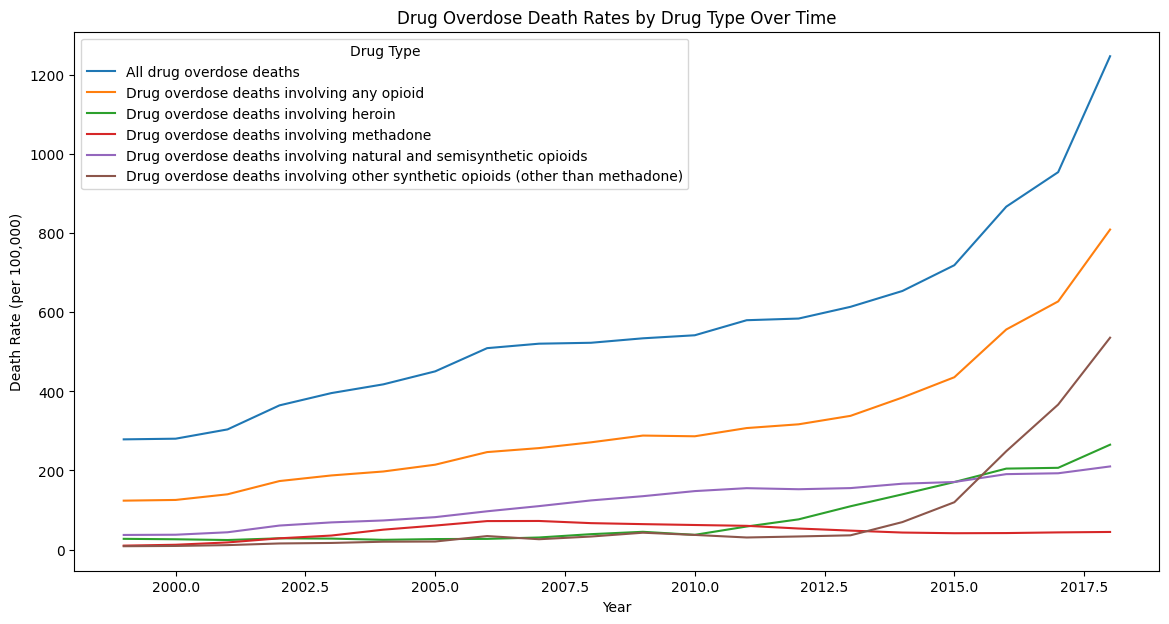

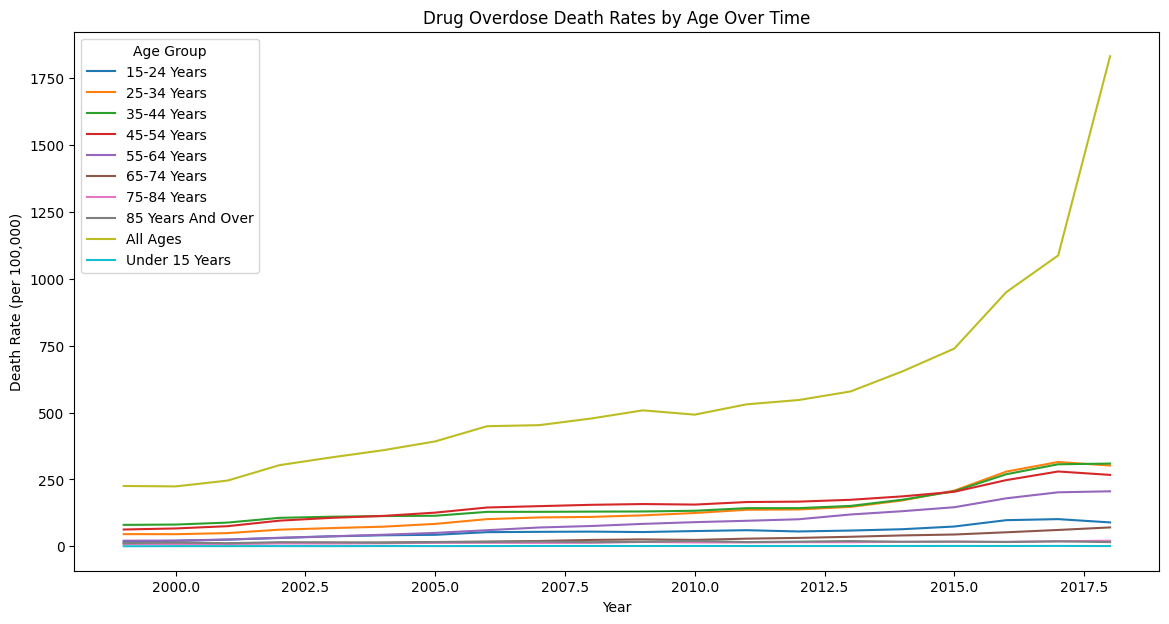

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot trends over time for overall death rates
plt.figure(figsize=(14, 7))
sns.lineplot(data=agg_by_year, x='YEAR', y='ESTIMATE')
plt.title('Overall Drug Overdose Death Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.show()

# Plot trends by drug overdose type
plt.figure(figsize=(14, 7))
sns.lineplot(data=agg_by_drug_type, x='YEAR', y='ESTIMATE', hue='PANEL')
plt.title('Drug Overdose Death Rates by Drug Type Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.legend(title='Drug Type')
plt.show()


# Plot trends by age
plt.figure(figsize=(14, 7))
sns.lineplot(data=agg_by_age, x='YEAR', y='ESTIMATE', hue='AGE')
plt.title('Drug Overdose Death Rates by Age Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000)')
plt.legend(title='Age Group')
plt.show()


In [ ]:
# Identify most affected demographic groups by drug type
demographic_groups = df.groupby(['PANEL', 'STUB_LABEL', 'AGE'])['ESTIMATE'].sum().reset_index()

# Display top affected groups
top_affected_groups = demographic_groups.sort_values(by='ESTIMATE', ascending=False).head(10)
print(top_affected_groups)


                                        PANEL  \
30                   All drug overdose deaths   
33                   All drug overdose deaths   
34                   All drug overdose deaths   
32                   All drug overdose deaths   
8                    All drug overdose deaths   
3                    All drug overdose deaths   
2                    All drug overdose deaths   
48                   All drug overdose deaths   
43                   All drug overdose deaths   
82  Drug overdose deaths involving any opioid   

                                           STUB_LABEL          AGE  ESTIMATE  
30                                               Male     All Ages     637.8  
33                                  Male: 35-44 Years  35-44 Years     586.5  
34                                  Male: 45-54 Years  45-54 Years     583.9  
32                                  Male: 25-34 Years  25-34 Years     524.9  
8                                         All Persons     All Age

In [ ]:
import re

# Define functions to extract sex and race
def extract_sex(label):
    match = re.search(r'\b(Male|Female)\b', label)
    return match.group(0) if match else 'Unknown'

def extract_race(label):
    race_list = ['White', 'Black or African American', 'American Indian or Alaska Native', 'Asian or Pacific Islander', 'Hispanic or Latino', 'Not Hispanic or Latino']
    for race in race_list:
        if race in label:
            return race
    return 'Unknown'

# Apply the functions to create new columns
df['Sex'] = df['STUB_LABEL'].apply(extract_sex)
df['Race'] = df['STUB_LABEL'].apply(extract_race)

# Display the updated dataframe
df.head(20)


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Sex,Race
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN,Unknown,Unknown
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,Unknown,Unknown
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,Unknown,Unknown
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,Unknown,Unknown
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN,Unknown,Unknown
5,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2004,6,All ages,1.1,9.4,NaN,Unknown,Unknown
6,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2005,7,All ages,1.1,10.1,NaN,Unknown,Unknown
7,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2006,8,All ages,1.1,11.5,NaN,Unknown,Unknown
8,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2007,9,All ages,1.1,11.9,NaN,Unknown,Unknown
9,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2008,10,All ages,1.1,11.9,NaN,Unknown,Unknown


In [ ]:
# Replace 'Unknown' with NaN for better handling of missing values
df['Sex'].replace('Unknown', pd.NA, inplace=True)
df['Race'].replace('Unknown', pd.NA, inplace=True)

# Display the count of missing values for Sex and Race columns
print(df[['Sex', 'Race']].isnull().sum())


Sex     1320
Race    3960
dtype: int64


In [ ]:
# Define functions to extract age-adjusted and crude
def extract_age_adjusted(unit):
    if 'age-adjusted' in unit:
        return 'Age-Adjusted'
    return 'Not Age-Adjusted'

def extract_crude(unit):
    if 'crude' in unit:
        return 'Crude'
    return 'Not Crude'

# Apply the functions to create new columns
df['Age_Adjusted'] = df['UNIT'].apply(extract_age_adjusted)
df['Crude'] = df['UNIT'].apply(extract_crude)

# Display the updated dataframe
df.head()


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG,Sex,Race,Age_Adjusted,Crude
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN,<NA>,<NA>,Age-Adjusted,Not Crude
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN,<NA>,<NA>,Age-Adjusted,Not Crude
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN,<NA>,<NA>,Age-Adjusted,Not Crude
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN,<NA>,<NA>,Age-Adjusted,Not Crude
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN,<NA>,<NA>,Age-Adjusted,Not Crude


In [ ]:
# Calculate mean and standard deviation of the ESTIMATE column
mean_estimate = df['ESTIMATE'].mean()
std_estimate = df['ESTIMATE'].std()

print(f"Mean Estimate: {mean_estimate}")
print(f"Standard Deviation: {std_estimate}")


Mean Estimate: 4.743443423881181
Standard Deviation: 6.424471157793793


In [ ]:
# Calculate the maximum and minimum values of the ESTIMATE column
max_estimate = df['ESTIMATE'].max()
min_estimate = df['ESTIMATE'].min()

print(f"Maximum Estimate: {max_estimate}")
print(f"Minimum Estimate: {min_estimate}")

Maximum Estimate: 54.3
Minimum Estimate: 0.0


In [ ]:
high_risk_threshold = mean_estimate + std_estimate
low_risk_threshold = mean_estimate - std_estimate

print(f"High Risk Threshold: {high_risk_threshold}")
print(f"Low Risk Threshold: {low_risk_threshold}")


High Risk Threshold: 11.167914581674975
Low Risk Threshold: -1.6810277339126118


In [ ]:
file_path = '/content/Health_Training_Set.csv'
train_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and content
train_df.head()

,INDICATOR,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,0,1,0,0.1,1,1.1,6.1,NaN
1,Drug overdose death rates,0,1,0,0.1,2,1.1,6.2,NaN
2,Drug overdose death rates,0,1,0,0.1,3,1.1,6.8,NaN
3,Drug overdose death rates,0,1,0,0.1,4,1.1,8.2,NaN
4,Drug overdose death rates,0,1,0,0.1,5,1.1,8.9,NaN


In [ ]:
file_path = '/content/Health_Test_Set.csv'
test_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and content
test_df.head()

,INDICATOR,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,1,1,4,4.4,1,1.1,NaN,*
1,Drug overdose death rates,1,1,4,4.8,1,1.1,NaN,*
2,Drug overdose death rates,1,1,4,4.8,2,1.1,NaN,*
3,Drug overdose death rates,1,1,4,4.8,3,1.1,NaN,*
4,Drug overdose death rates,1,1,4,4.8,4,1.1,NaN,*


In [75]:
# Define the features and target variable
features = ['YEAR_NUM', 'AGE_NUM', 'PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'Sex_Male', 'Race_Hispanic_or_Latino']
target = 'ESTIMATE'

# Split the data into training and test sets based on missing values in the target
train_df = df.dropna(subset=[target])
test_df = df[df[target].isna()]

# Split the data into features and target
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

# Create and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
test_df.loc[:, 'ESTIMATE'] = model.predict(X_test)

# Assuming we want to test on the non-missing values only for validation
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model on the full training data
model.fit(X_train_full, y_train_full)

# Make predictions on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')

# Optional: Display the first few rows of the test set with predictions
print(test_df.head())

Validation RMSE: 2.4236703497810015
Validation R²: 0.8658410802062467


**Gradient Boosting Regressor**

# **Machine Learning**

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import confusion_matrix

In [113]:
file_path = '/content/final_overdose.xlsx'
df = pd.read_excel(file_path)


In [114]:
# Create dummy variables for 'Sex'
df['Sex_Male'] = df['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
df['Sex_Female'] = df['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

# Create dummy variables for 'Race'
df['Race_Hispanic_or_Latino'] = df['Race'].apply(lambda x: 1 if x == 'Hispanic or Latino' else 0)
df['Race_Not_Hispanic_or_Latino'] = df['Race'].apply(lambda x: 1 if x == 'Not Hispanic or Latino' else 0)



In [115]:
# Separate the dataset into training and testing sets based on 'ESTIMATE' column
train_df = df[df['ESTIMATE'].notna()]
test_df = df[df['ESTIMATE'].isna()]

# Display the shapes of the resulting datasets
train_df.shape, test_df.shape


((5117, 19), (1111, 19))

**Linear Regression**

In [116]:
# Define the features and target variable
features = ['YEAR_NUM', 'AGE_NUM', 'PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'Sex_Male', 'Race_Hispanic_or_Latino']
target = 'ESTIMATE'

# Split the data into training and test sets based on missing values in the target
train_df = df.dropna(subset=[target])
test_df = df[df[target].isna()]

# Split the data into features and target
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model on the training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Display the results
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')

# Make predictions on the test set with missing 'ESTIMATE' values and display them
test_df['ESTIMATE'] = y_pred_test
print(test_df.head())

Training RMSE: 5.170325947508316
Training R²: 0.3521925187403545
            PANEL  PANEL_NUM          UNIT  UNIT_NUM     STUB_NAME  \
1104  Any Opioids          1  age adjusted         1  Sex and race   
1184  Any Opioids          1  age adjusted         1  Sex and race   
1185  Any Opioids          1  age adjusted         1  Sex and race   
1186  Any Opioids          1  age adjusted         1  Sex and race   
1187  Any Opioids          1  age adjusted         1  Sex and race   

      STUB_NAME_NUM  STUB_LABEL_NUM  YEAR  YEAR_NUM       AGE  AGE_NUM  \
1104              4             4.4  1999         1  All ages      1.1   
1184              4             4.8  1999         1  All ages      1.1   
1185              4             4.8  2000         2  All ages      1.1   
1186              4             4.8  2001         3  All ages      1.1   
1187              4             4.8  2002         4  All ages      1.1   

      ESTIMATE                       Race            Age     Sex  Sex

<ipython-input-116-69d5d2aef495>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ESTIMATE'] = y_pred_test


**Decision Tree**

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = -grid_search_dt.best_score_

best_params_dt, best_score_dt


({'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2},
 13.19428285803473)

In [119]:


# Assuming you have a feature matrix X_train with column names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Get feature importances from the best estimator
feature_importances = grid_search_dt.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

print(top_10_features)


                   Feature  Importance
2                PANEL_NUM    0.328349
1                  AGE_NUM    0.293971
0                 YEAR_NUM    0.162862
5           STUB_LABEL_NUM    0.141852
6                 Sex_Male    0.062921
7  Race_Hispanic_or_Latino    0.005093
4            STUB_NAME_NUM    0.004917
3                 UNIT_NUM    0.000035


**Random Forest Regressor**

In [120]:
# Define the features and target variable
features = ['YEAR_NUM', 'AGE_NUM', 'PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'Sex_Male', 'Race_Hispanic_or_Latino']
target = 'ESTIMATE'

# Split the data into training and test sets based on missing values in the target
train_df = df.dropna(subset=[target])
test_df = df[df[target].isna()]

# Split the data into features and target
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]

# Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')

# Make predictions on the test set
test_df.loc[:, 'ESTIMATE'] = model.predict(X_test)

# Assuming we want to test on the non-missing values only for validation
validation_df = df.dropna(subset=[target])
X_val = validation_df[features]
y_val = validation_df[target]

# Evaluate the model on the validation set
y_pred_val = model.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f'Validation RMSE: {rmse_val}')
print(f'Validation R²: {r2_val}')


Training RMSE: 0.3902934899018562
Training R²: 0.9963085862265293
Validation RMSE: 0.3902934899018562
Validation R²: 0.9963085862265293


In [121]:
# Select features for the test set
X_test = test_df[features]

# Predict the ESTIMATE values for the test set
test_df['ESTIMATE_PREDICTED'] = model.predict(X_test)

# Display the first few rows of the test set with the predicted values
test_df[[ 'YEAR_NUM', 'AGE_NUM', 'PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'Sex_Male', 'Race_Hispanic_or_Latino', 'ESTIMATE_PREDICTED']].head()

<ipython-input-121-8fdecad3757d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ESTIMATE_PREDICTED'] = model.predict(X_test)


,YEAR_NUM,AGE_NUM,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,Sex_Male,Race_Hispanic_or_Latino,ESTIMATE_PREDICTED
1104,1,1.1,1,1,4,4.4,1,0,0.629
1184,1,1.1,1,1,4,4.8,0,0,1.395
1185,2,1.1,1,1,4,4.8,0,0,1.227
1186,3,1.1,1,1,4,4.8,0,0,1.430
1187,4,1.1,1,1,4,4.8,0,0,0.924


In [122]:
# Get feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_10_features = importance_df.head(10)
print(top_10_features)

                   Feature  Importance
2                PANEL_NUM    0.330176
1                  AGE_NUM    0.269693
0                 YEAR_NUM    0.176921
5           STUB_LABEL_NUM    0.155854
6                 Sex_Male    0.053692
4            STUB_NAME_NUM    0.009756
7  Race_Hispanic_or_Latino    0.003539
3                 UNIT_NUM    0.000369


RMSE, R-squared for Random Forest Regressor

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the training set
train_predictions = model.predict(X_train)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

# Calculate R² score
r2 = r2_score(y_train, train_predictions)

rmse, r2


(0.3902934899018562, 0.9963085862265293)

**All other models**

In [124]:
# Define the features and target variable
features = ['YEAR_NUM', 'AGE_NUM', 'PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'Sex_Male', 'Race_Hispanic_or_Latino']
target = 'ESTIMATE'

# Create a subset of the data with non-missing `ESTIMATE` values
df_non_nan = df.dropna(subset=[target])

# Split the data into features and target
X = df_non_nan[features]
y = df_non_nan[target]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)

    mse_val = mean_squared_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)
    rmse_val = np.sqrt(mse_val)

    results[name] = {
        'Training RMSE': rmse_train,
        'Validation RMSE': rmse_val,
        'Training R²': r2_train,
        'Validation R²': r2_val
    }

    # Get feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': features,
            'Importance': feature_importances
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        results[name]['Top Features'] = importance_df.head(10).reset_index(drop=True)

# Display results in a table
results_df = pd.DataFrame(results).transpose()

# Ensure the numeric columns are of numeric dtype
numeric_columns = ['Training RMSE', 'Validation RMSE', 'Training R²', 'Validation R²']
results_df[numeric_columns] = results_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

print("Model Comparison:")
print(results_df)

# Identify the best model based on Validation RMSE
best_model = results_df['Validation RMSE'].idxmin()
print(f"\nBest model based on Validation RMSE: {best_model}")
print(results_df.loc[best_model])

# Print top features for the best model
if 'Top Features' in results[best_model]:
    print("\nTop Features for the best model:")
    print(results[best_model]['Top Features'])

Model Comparison:
                               Training RMSE  Validation RMSE  Training R²  \
Linear Regression                   5.144354         5.276151     0.348726   
Decision Tree Regressor             0.272650         1.080268     0.998171   
Random Forest Regressor             0.461956         0.901290     0.994748   
Gradient Boosting Regressor         2.293908         2.423670     0.870505   
Support Vector Regressor            5.237169         5.426057     0.325013   
K-Nearest Neighbors Regressor       3.927569         5.065656     0.620379   
Neural Network                      3.318968         3.452673     0.728913   

                               Validation R²  \
Linear Regression                   0.364220   
Decision Tree Regressor             0.973348   
Random Forest Regressor             0.981448   
Gradient Boosting Regressor         0.865841   
Support Vector Regressor            0.327579   
K-Nearest Neighbors Regressor       0.413938   
Neural Network       